<a href="https://colab.research.google.com/github/ShivaniKale0/Hackathon-/blob/Carolina-Data-Challenge-2023/Natural_Science_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Approach

Steps followed:
1.   Connecting with Google Drive
2.   Dropping unwanted column for dataset
2.   Importing Dataset
3.   Installing and Importing Libraries
4.   Checking Null Values
5.   Dropping column with 100% null values
6.   Creating new columns to analyse data
7.   Checking Correlation between fields
8.   Analyzing data based on different types of charts
9.   Visualizing data using map

Type of Analysis: **Descriptive and Diagnostic Analysis**

# Connecting to Drive and importing data

Connecting to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/CDC2023
!ls

/content/gdrive/MyDrive/CDC2023
'CDC 2023 Natural Science Project.gslides'   NautralSciences_Dataset.xlsx
 Natural_Science_Analysis_Project.ipynb


Importing Required Libraries

In [3]:
!pip install plotly

In [58]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler

Importing Data

We have removed the code and id columns which we are not going to use for our Analysis, the columns include:
'OBJECTID','FOD_ID','FPA_ID','SOURCE_SYSTEM','NWCG_REPORTING_UNIT_ID','LOCAL_FIRE_REPORT_ID','SOURCE_REPORTING_UNIT','LOCAL_INCIDENT_ID','FIRE_CODE''FIRE_NAME','ICS_209_INCIDENT_NUMBER','ICS_209_NAME','MTBS_ID','MTBS_FIRE_NAME','COMPLEX_NAME','DISCOVERY_DATE','STAT_CAUSE_CODE', 'CONT_DATE','OWNER_CODE','FIPS_CODE','FIPS_NAME'

In [5]:
# Creating dataframe to store data
raw_df = pd.read_excel('NautralSciences_Dataset.xlsx', sheet_name='Fires')

In [6]:
# Get sense of data
print(raw_df.head())
print(raw_df.info())

  SOURCE_SYSTEM_TYPE NWCG_REPORTING_AGENCY  NWCG_REPORTING_UNIT_NAME  \
0             NONFED                ST/C&L  San Benito-Monterey Unit   
1             NONFED                ST/C&L  San Benito-Monterey Unit   
2             NONFED                ST/C&L  San Benito-Monterey Unit   
3             NONFED                ST/C&L  San Benito-Monterey Unit   
4             NONFED                ST/C&L  San Benito-Monterey Unit   

       SOURCE_REPORTING_UNIT_NAME  FIRE_YEAR  DISCOVERY_DOY  DISCOVERY_TIME  \
0  CDF - San Benito-Monterey Unit       2010            139             NaN   
1  CDF - San Benito-Monterey Unit       2010            159             NaN   
2  CDF - San Benito-Monterey Unit       2010            163             NaN   
3  CDF - San Benito-Monterey Unit       2010            165             NaN   
4  CDF - San Benito-Monterey Unit       2010            192             NaN   

  STAT_CAUSE_DESCR  CONT_DOY  CONT_TIME  FIRE_SIZE FIRE_SIZE_CLASS   LATITUDE  \
0    Equipm

# Data Cleaning/Wrangling and Feature Engineering

In [7]:
#Checking for null values
(raw_df.isnull().sum() / len(raw_df)) * 100

SOURCE_SYSTEM_TYPE              0.000000
NWCG_REPORTING_AGENCY           0.000000
NWCG_REPORTING_UNIT_NAME        0.000000
SOURCE_REPORTING_UNIT_NAME      0.000000
FIRE_YEAR                       0.000000
DISCOVERY_DOY                   0.000000
DISCOVERY_TIME                 56.215751
STAT_CAUSE_DESCR                0.000000
CONT_DOY                       57.883604
CONT_TIME                      60.703944
FIRE_SIZE                       0.000000
FIRE_SIZE_CLASS                 0.000000
LATITUDE                        0.000000
LONGITUDE                       0.000000
OWNER_DESCR                     0.000000
STATE                           0.000000
COUNTY                         34.139825
Shape                         100.000000
dtype: float64

In [8]:
#Dropping the Shape column as it's empty
raw_df = raw_df.drop(columns = ['Shape'])

Creating new columns

In [9]:
# Defining function to get the month of year
def get_month(year, doy):
  if year % 4 == 0:
    return (datetime(2000, 1, 1) + timedelta(days=doy-1)).strftime('%B')
  else:
    return (datetime(2001, 1, 1) + timedelta(days=doy-1)).strftime('%B')


# Creating a month field to get the month of year in which the fire was discovered
raw_df['DISCOVERY_MONTH'] = raw_df.apply(lambda row: get_month(row['FIRE_YEAR'], row['DISCOVERY_DOY']), axis=1)
raw_df["DISCOVERY_MONTH"] = raw_df["DISCOVERY_MONTH"].astype("category")


print(raw_df['DISCOVERY_MONTH'].unique())

['May', 'June', 'July', 'September', 'March', ..., 'January', 'February', 'April', 'November', 'December']
Length: 12
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November',
                          'October', 'September']


Understanding Correlation between the features

<ipython-input-10-c1ae0d0672af>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_df.corr() * 100, annot=True, cmap='YlGnBu', linewidths=0.3)


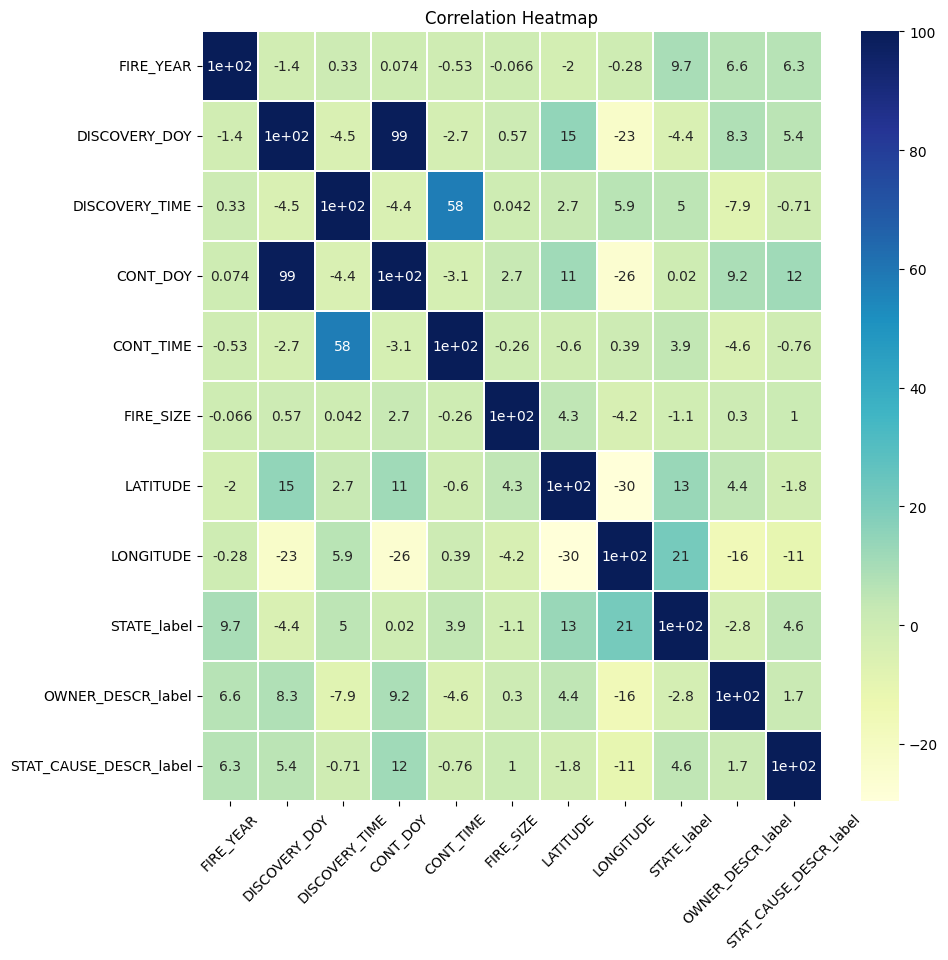

In [10]:
# Label encoding to include categorical data in heatmap
raw_df['STATE_label'] = raw_df['STATE'].astype('category').cat.codes
raw_df['OWNER_DESCR_label'] = raw_df['OWNER_DESCR'].astype('category').cat.codes
raw_df['STAT_CAUSE_DESCR_label'] = raw_df['STAT_CAUSE_DESCR'].astype('category').cat.codes

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 10))  # Adjust the figure size if needed
sns.heatmap(raw_df.corr() * 100, annot=True, cmap='YlGnBu', linewidths=0.3)

# Customize the heatmap appearance (optional)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the heatmap
plt.show()

# Data Analysis

Fires by discovery day of year by fire size

<Axes: title={'center': 'Size of Fire by Day of Year'}, xlabel='DISCOVERY_DOY', ylabel='FIRE_SIZE'>

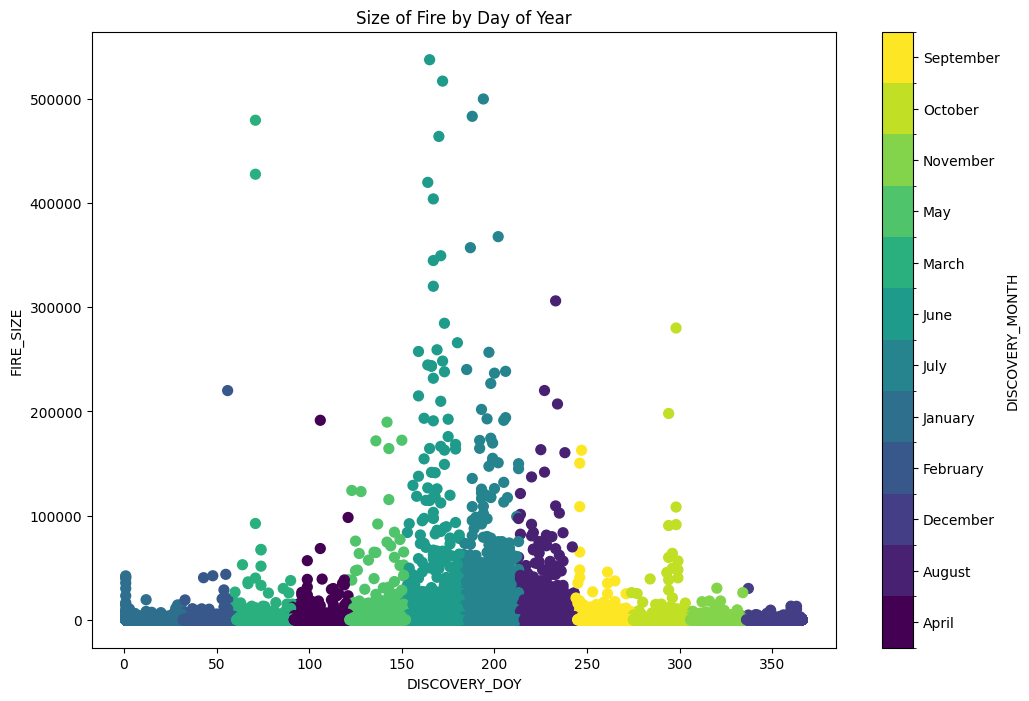

In [11]:

raw_df.plot.scatter(
    x="DISCOVERY_DOY", y="FIRE_SIZE", c="DISCOVERY_MONTH", cmap="viridis", s=50, title= 'Size of Fire by Day of Year',
    figsize=(12,8)
  )


Fires by year by class

<Axes: title={'center': 'Acres of Land Affect Per Year and the Fire Size Class'}, xlabel='FIRE_YEAR'>

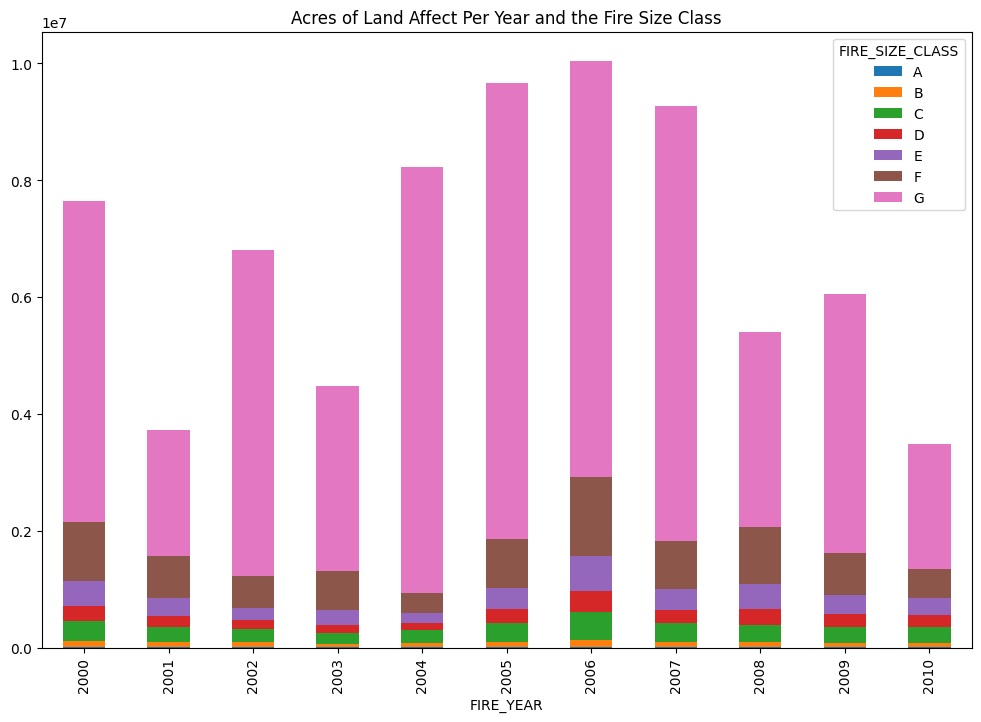

In [12]:
df2 = raw_df.groupby(["FIRE_YEAR", "FIRE_SIZE_CLASS"])["FIRE_SIZE"].sum()
df2 = df2.unstack("FIRE_SIZE_CLASS")
df2.plot.bar(stacked=True, figsize=(12,8), title = 'Acres of Land Affect Per Year and the Fire Size Class')

Fires by month

<Axes: title={'center': 'Number of Incidents per month'}>

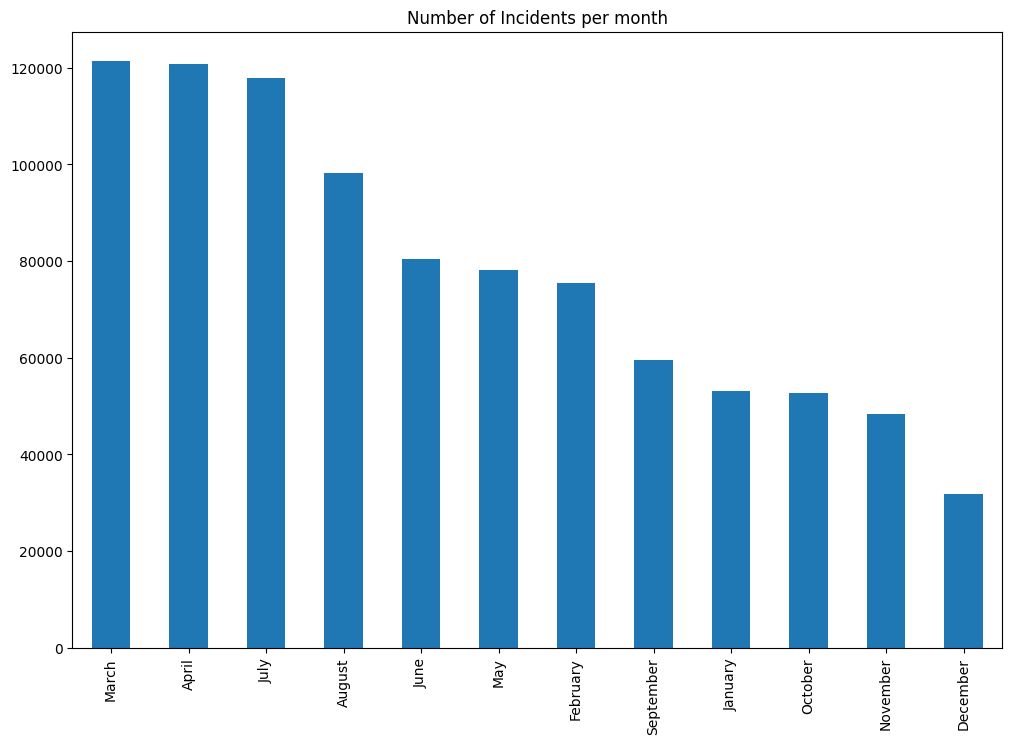

In [13]:
month_count = pd.value_counts(raw_df["DISCOVERY_MONTH"].values)
month_count.plot.bar(figsize=(12,8), title = 'Number of Incidents per month')

Calculating the recovery time required

In [14]:
#Defining function to convert time in proper format

def format_time(time):
  if len(time) == 1:
    time = '0'+time[:1]+':00:00'
  elif len(time) == 2:
    time = '0'+time[:1]+':0'+time[1:2]+':00'
  elif len(time) == 3:
    time = '0'+time[:1]+':'+time[1:3]+':00'
  elif len(time) == 4:
    time = time[:2]+':'+time[2:]+':00'
  return time


In [15]:
# Create new dataframe by eliminating null values from the given columns
recovery_df = raw_df.dropna(subset=['CONT_DOY', 'CONT_TIME', 'DISCOVERY_TIME'])

# Formate the time columns
recovery_df['DISCOVERY_TIME'] = recovery_df['DISCOVERY_TIME'].apply(lambda row: format_time(str(round(row))))

recovery_df['DISCOVERY_DOY'] = recovery_df['DISCOVERY_DOY'].astype(int)
recovery_df['FIRE_YEAR'] = recovery_df['FIRE_YEAR'].astype(int)

# Create a proper date of contained fire
recovery_df['DISCOVERY_DATE'] = pd.to_datetime(recovery_df['FIRE_YEAR'], format='%Y') + \
                           pd.to_timedelta(recovery_df['DISCOVERY_DOY'], unit='D') + \
                           pd.to_timedelta(recovery_df['DISCOVERY_TIME'])

# Formate the time columns
recovery_df['CONT_TIME'] = recovery_df['CONT_TIME'].apply(lambda row: format_time(str(round(row))))

recovery_df['CONT_DOY'] = recovery_df['CONT_DOY'].astype(int)
recovery_df['FIRE_YEAR'] = recovery_df['FIRE_YEAR'].astype(int)

# Create a proper date of contained fire
recovery_df['CONT_DATE'] = pd.to_datetime(recovery_df['FIRE_YEAR'], format='%Y') + \
                           pd.to_timedelta(recovery_df['CONT_DOY'], unit='D') + \
                           pd.to_timedelta(recovery_df['CONT_TIME'])


recovery_df['DATE_DIFFERENCE'] = recovery_df['CONT_DATE'] - recovery_df['DISCOVERY_DATE']

recovery_df['Hours'] = recovery_df['DATE_DIFFERENCE'].dt.seconds / 3600
recovery_df['Minutes'] = (recovery_df['DATE_DIFFERENCE'].dt.seconds % 3600) / 60
recovery_df['TIME_DIFFERENCE'] = recovery_df['Hours'].astype(float) + recovery_df['Minutes'].astype(float) / 60.0

print(recovery_df['TIME_DIFFERENCE'])

<ipython-input-15-447c85c93614>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovery_df['DISCOVERY_TIME'] = recovery_df['DISCOVERY_TIME'].apply(lambda row: format_time(str(round(row))))
<ipython-input-15-447c85c93614>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovery_df['DISCOVERY_DOY'] = recovery_df['DISCOVERY_DOY'].astype(int)
<ipython-input-15-447c85c93614>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

1388      0.000000
1389      0.000000
1392      0.066667
1407      5.400000
1463      0.233333
            ...   
935655    0.000000
935656    0.000000
935657    0.000000
935658    0.000000
935659    0.000000
Name: TIME_DIFFERENCE, Length: 368015, dtype: float64


<ipython-input-15-447c85c93614>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovery_df['CONT_DATE'] = pd.to_datetime(recovery_df['FIRE_YEAR'], format='%Y') + \
<ipython-input-15-447c85c93614>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recovery_df['DATE_DIFFERENCE'] = recovery_df['CONT_DATE'] - recovery_df['DISCOVERY_DATE']
<ipython-input-15-447c85c93614>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

<Axes: title={'center': 'Number of hours required to contain the fire per year for each fire size class'}, xlabel='FIRE_YEAR'>

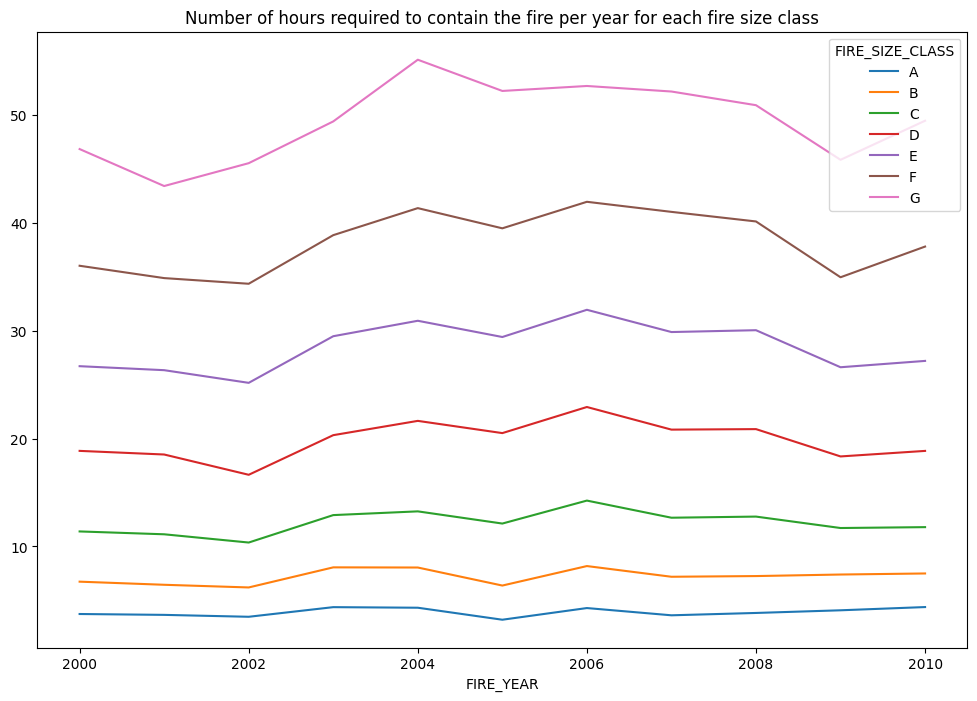

In [16]:
recovery_df2 = recovery_df.groupby(["FIRE_YEAR", "FIRE_SIZE_CLASS"])["TIME_DIFFERENCE"].mean()
recovery_df2 = recovery_df2.unstack("FIRE_SIZE_CLASS")
recovery_df2.plot.line(stacked=True, figsize=(12,8), title = 'Number of hours required to contain the fire per year for each fire size class')

# Visualizations

In [59]:
# Defining function to create map
def create_map(dictionary, fig, title,color):
  # Create a Choropleth plot using state_counts_dict
  fig.add_trace(go.Choropleth(
      locations=list(dictionary.keys()),
      z=list(dictionary.values()),
      locationmode='USA-states',
      hoverinfo="z+location",
      showscale=True,
      colorscale=color,
      colorbar=dict(
          title="State Counts",
          xanchor="left",
          lenmode="fraction",
          len=0.5
      ),
  ))
  fig.update_geos(scope="usa")
  fig.update_layout(title_text=title)

# Create a MinMaxScaler and define the new range
scaler = MinMaxScaler(feature_range=(1, 10))

In [68]:
# Group by 'State' and get the count of data in each group
count_of_states = raw_df.groupby('STATE').size()

# Fit and transform the count_of_states column
count_of_states = scaler.fit_transform(count_of_states.values.reshape(-1, 1))

# Create a dictionary to map state codes to counts
count_of_states = dict(zip(raw_df['STATE'].unique(), count_of_states.ravel()))

# Create a plot
fig_size_of_fire= go.Figure()

# Call the create_map function to create the map and show data on the map
create_map(count_of_states, fig_size_of_fire, 'Number of Incidents per state','fall')

# Display the map
fig_size_of_fire.show()

In [143]:
def creating_categorical_maps(column_name, value, figure, title, color):
  sub_df = raw_df[raw_df[column_name] == value][['STATE']]

  # Group by 'State' and get the count of data in each group
  count_of_states = sub_df.groupby('STATE').size()

  # Fit and transform the count_of_states column
  count_of_states = scaler.fit_transform(count_of_states.values.reshape(-1, 1))

  # Create a dictionary to map state codes to counts
  count_of_states = dict(zip(raw_df['STATE'].unique(), count_of_states.ravel()))

  # Call the create_map function to create the map and show data on the map
  create_map(count_of_states, figure, title, color)

In [144]:
# Create a plot
fig_size_A = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_SIZE_CLASS', 'A', fig_size_A, 'Number of Incidents per state for Fire Size A', 'amp')

# Display the map
fig_size_A.show()

In [145]:
# Create a plot
fig_size_B = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_SIZE_CLASS', 'B', fig_size_B, 'Number of Incidents per state for Fire Size B', 'amp')

# Display the map
fig_size_B.show()

In [146]:
# Create a plot
fig_size_C = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_SIZE_CLASS', 'C', fig_size_C, 'Number of Incidents per state for Fire Size C', 'amp')

# Display the map
fig_size_C.show()

In [148]:
# Create a plot
fig_size_D = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_SIZE_CLASS', 'D', fig_size_D, 'Number of Incidents per state for Fire Size D', 'amp')

# Display the map
fig_size_D.show()

In [150]:
# Create a plot
fig_size_E = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_SIZE_CLASS', 'E', fig_size_E, 'Number of Incidents per state for Fire Size E', 'amp')

# Display the map
fig_size_E.show()

In [151]:
# Create a plot
fig_size_F = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_SIZE_CLASS', 'F', fig_size_F, 'Number of Incidents per state for Fire Size F', 'amp')

# Display the map
fig_size_F.show()

In [153]:
# Create a plot
fig_size_G = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_SIZE_CLASS', 'G', fig_size_G, 'Number of Incidents per state for Gire Size G', 'amp')

# Display the map
fig_size_G.show()

In [80]:
raw_df['STAT_CAUSE_DESCR'].unique()

array(['Equipment Use', 'Miscellaneous', 'Debris Burning', 'Children',
       'Arson', 'Smoking', 'Railroad', 'Campfire', 'Lightning',
       'Powerline', 'Structure', 'Missing/Undefined', 'Fireworks'],
      dtype=object)

In [155]:
# Create a plot
fig_size_cause_Equipment_Use = go.Figure()

# Calling function to create chart
creating_categorical_maps('STAT_CAUSE_DESCR', 'Equipment Use', fig_size_cause_Equipment_Use, 'Number of Incidents per state caused by Equipment Use', 'blugrn')

# Display the map
fig_size_cause_Equipment_Use.show()


In [156]:
# Create a plot
fig_size_cause_Miscellaneous = go.Figure()

# Calling function to create chart
creating_categorical_maps('STAT_CAUSE_DESCR', 'Miscellaneous', fig_size_cause_Miscellaneous, 'Number of Incidents per state caused by Miscellaneous', 'blugrn')

# Display the map
fig_size_cause_Miscellaneous.show()


In [157]:
# Create a plot
fig_size_cause_Debris_Burning = go.Figure()

# Calling function to create chart
creating_categorical_maps('STAT_CAUSE_DESCR', 'Debris Burning', fig_size_cause_Debris_Burning, 'Number of Incidents per state caused by Debris Burning', 'blugrn')

# Display the map
fig_size_cause_Debris_Burning.show()


In [158]:
# Create a plot
fig_size_cause_Children = go.Figure()

# Calling function to create chart
creating_categorical_maps('STAT_CAUSE_DESCR', 'Children', fig_size_cause_Children, 'Number of Incidents per state caused by Children', 'blugrn')

# Display the map
fig_size_cause_Children.show()


In [159]:
# Create a plot
fig_size_cause_Arson = go.Figure()

# Calling function to create chart
creating_categorical_maps('STAT_CAUSE_DESCR', 'Arson', fig_size_cause_Arson, 'Number of Incidents per state caused by Arson', 'blugrn')

# Display the map
fig_size_cause_Arson.show()


In [160]:
# Create a plot
fig_size_cause_Smoking = go.Figure()

# Calling function to create chart
creating_categorical_maps('STAT_CAUSE_DESCR', 'Smoking', fig_size_cause_Smoking, 'Number of Incidents per state caused by Smoking', 'blugrn')

# Display the map
fig_size_cause_Smoking.show()


In [161]:
# Create a plot
fig_size_cause_Railroad = go.Figure()

# Calling function to create chart
creating_categorical_maps('STAT_CAUSE_DESCR', 'Railroad', fig_size_cause_Railroad, 'Number of Incidents per state caused by Railroad', 'blugrn')

# Display the map
fig_size_cause_Railroad.show()


In [162]:
# Create a plot
fig_size_cause_Campfire = go.Figure()

# Calling function to create chart
creating_categorical_maps('STAT_CAUSE_DESCR', 'Campfire', fig_size_cause_Campfire, 'Number of Incidents per state caused by Campfire', 'blugrn')

# Display the map
fig_size_cause_Campfire.show()


In [163]:
# Create a plot
fig_size_cause_Lightning = go.Figure()

# Calling function to create chart
creating_categorical_maps('STAT_CAUSE_DESCR', 'Lightning', fig_size_cause_Lightning, 'Number of Incidents per state caused by Lightning', 'blugrn')

# Display the map
fig_size_cause_Lightning.show()


In [164]:
# Create a plot
fig_size_cause_Powerline = go.Figure()

# Calling function to create chart
creating_categorical_maps('STAT_CAUSE_DESCR', 'Powerline', fig_size_cause_Powerline, 'Number of Incidents per state caused by Powerline', 'blugrn')

# Display the map
fig_size_cause_Powerline.show()


In [165]:
# Create a plot
fig_size_cause_Structure = go.Figure()

# Calling function to create chart
creating_categorical_maps('STAT_CAUSE_DESCR', 'Structure', fig_size_cause_Structure, 'Number of Incidents per state caused by Structure', 'blugrn')

# Display the map
fig_size_cause_Structure.show()


In [166]:
# Create a plot
fig_size_cause_Fireworks = go.Figure()

# Calling function to create chart
creating_categorical_maps('STAT_CAUSE_DESCR', 'Fireworks', fig_size_cause_Fireworks, 'Number of Incidents per state caused by Fireworks', 'blugrn')

# Display the map
fig_size_cause_Fireworks.show()


In [168]:
# Create a plot
fire_size_year_2000 = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_YEAR', 2000, fire_size_year_2000, 'Number of Incidents per state in the year 2000', 'purples')

# Display the map
fire_size_year_2000.show()


In [169]:
# Create a plot
fire_size_year_2001 = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_YEAR', 2001, fire_size_year_2001, 'Number of Incidents per state in the year 2001', 'purples')

# Display the map
fire_size_year_2001.show()

In [170]:
# Create a plot
fire_size_year_2002 = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_YEAR', 2002, fire_size_year_2002, 'Number of Incidents per state in the year 2002', 'purples')

# Display the map
fire_size_year_2002.show()

In [171]:
# Create a plot
fire_size_year_2003 = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_YEAR', 2003, fire_size_year_2003, 'Number of Incidents per state in the year 2003', 'purples')

# Display the map
fire_size_year_2003.show()

In [172]:
# Create a plot
fire_size_year_2004 = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_YEAR', 2004, fire_size_year_2004, 'Number of Incidents per state in the year 2004', 'purples')

# Display the map
fire_size_year_2004.show()

In [173]:
# Create a plot
fire_size_year_2005 = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_YEAR', 2005, fire_size_year_2005, 'Number of Incidents per state in the year 2005', 'purples')

# Display the map
fire_size_year_2005.show()

In [174]:
# Create a plot
fire_size_year_2006 = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_YEAR', 2006, fire_size_year_2006, 'Number of Incidents per state in the year 2006', 'purples')

# Display the map
fire_size_year_2006.show()

In [175]:
# Create a plot
fire_size_year_2007 = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_YEAR', 2007, fire_size_year_2007, 'Number of Incidents per state in the year 2007', 'purples')

# Display the map
fire_size_year_2007.show()

In [176]:
# Create a plot
fire_size_year_2008 = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_YEAR', 2008, fire_size_year_2008, 'Number of Incidents per state in the year 2008', 'purples')

# Display the map
fire_size_year_2008.show()

In [177]:
# Create a plot
fire_size_year_2009 = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_YEAR', 2009, fire_size_year_2009, 'Number of Incidents per state in the year 2009', 'purples')

# Display the map
fire_size_year_2009.show()

In [178]:
# Create a plot
fire_size_year_2010 = go.Figure()

# Calling function to create chart
creating_categorical_maps('FIRE_YEAR', 2010, fire_size_year_2010, 'Number of Incidents per state in the year 2010', 'purples')

# Display the map
fire_size_year_2010.show()